In [4]:
import numpy as np
from scipy.io import wavfile
import warnings
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time

In [7]:
def get_fft_at_slice(start, duration, path, plot):

    fs, data = wavfile.read(path)
    time_slice = duration
    start_samples = int(start*fs)
    num_samples = int(time_slice * fs)

    transform_data = data[start_samples:start_samples + num_samples]
    a = transform_data.T[0]
    b = [(ele / 2 ** 8.) * 2 - 1 for ele in a]
    c = fft(b)
    d = int(len(c) / 2)

    if plot:
        d = 2000
        plt.plot(abs(c[:(d - 1)]), 'r')
        plt.show()
        return abs(c[:(d - 1)])
    else:
        return abs(c[:(d - 1)])


In [122]:

def gradient_descent_2(arr, guesses, max_iter, show_results, inititial_run, learning_rate=10):


    start_time = time.time()
    maxes = []

    for guess in guesses:
        dynamic_learning_rate = learning_rate
        index = guess
        max = arr[guess]
        max_index = guess
        for i in range(1, max_iter):
            if(index<0):
                index = 0
            dynamic_learning_rate = dynamic_learning_rate*0.95
            if(arr[index]>max):
                max_index = index
                max = arr[index]

            grad = (arr[index+1]/arr[index])
            if(grad < 1):
                grad = -1/grad
            index += int(grad*dynamic_learning_rate)
        maxes.append(max_index)

   

    returnval = (get_prox(arr, maxes, 60))

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    if(show_results == True):
        print("===== iteration results =====")
        print("max value found: ", max)
        print("maximum index: ", returnval)
        print("time elapsed: ", elapsed_time)
        print("============================")
    return returnval
    #return maxes
    #return maxes[np.argmax(arr[maxes])]

In [13]:
def plot_error_freq(arr, window_size, x_values):
    moving_avg = np.convolve(arr, np.ones(window_size) / window_size, mode='valid')
    #plt.plot(arr, label='Original Data')
    pad_left = (len(x_values) - len(moving_avg)) // 2
    pad_right = len(x_values) - len(moving_avg) - pad_left
    moving_avg = np.pad(moving_avg, (pad_left, pad_right), mode='constant', constant_values=0)

    plt.plot(x_values, moving_avg)
    plt.xlabel('FFT Chunk Size')
    plt.ylabel('Error')
    plt.title('Moving Average of Error Freq.')
    plt.legend()
    plt.grid(True)
    plt.show()

In [120]:
def plot_errors(path):
    errors = []
    for slice_size in np.arange(0.05, 2, 0.005):
        for i in range(0, 1):
            slice = get_fft_at_slice(i, slice_size, path, plot=False)
            # print(len(slice))
            freq = gradient_descent_2(slice, guesses=[100, 200, 300, 400, 500], max_iter=300, show_results=False, inititial_run=True)
            true_value = np.argmax(slice)
            errors.append(abs(true_value-freq))

    plot_error_freq(errors, 30, np.arange(0.05, 2, 0.005))
    print(errors)
    print("average error", np.sum(errors)/len(errors))
    x_values = np.arange(0.05, 2, 0.005)
    y_values = errors

    plt.plot(x_values, y_values)
    plt.xlabel('slice size')
    plt.ylabel('error')
    plt.title('Plot of errors')
    plt.grid(True)
    plt.show()

In [103]:
def get_prox(arr, guesses, num):
    max = 0
    max_index = 0
    for i in guesses:
        for j in range(-1*int(num/2), int(num/2)):
            if(arr[i+j]>max):
                max = arr[i+j]
                max_index = i+j
    return max_index





In [123]:
slice_size = 0.2
for i in range(0, 1):
    slice = get_fft_at_slice(i, slice_size, 'sample_1.wav', plot=False)
    #print(len(slice))
    freq = gradient_descent_2(slice, guesses=[100, 200, 300, 400, 500, 600, 700, 800], max_iter=200, inititial_run=True, show_results=True)
    
    print("true value -> ", np.argmax(slice))

===== iteration results =====
max value found:  56528962.17328348
maximum index:  105
time elapsed:  0.0010600090026855469
true value ->  105


C:\Users\hudso\AppData\Local\Temp\ipykernel_5028\4121391281.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path)


C:\Users\hudso\AppData\Local\Temp\ipykernel_5028\4121391281.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


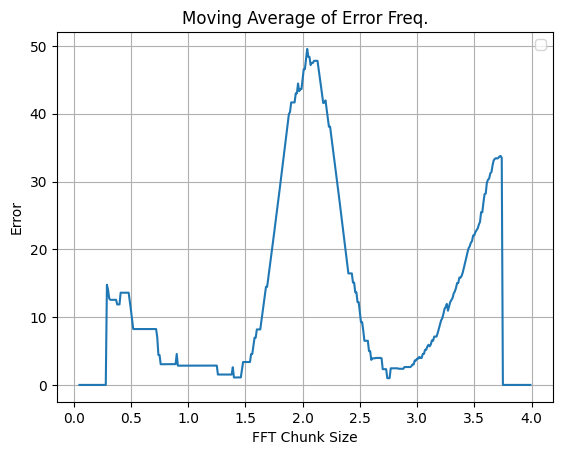

In [126]:
errors = []
x_range = np.arange(0.05, 4, 0.01)
for slice_size in x_range:
    for i in range(0, 1):
        slice = get_fft_at_slice(i, slice_size, 'sample_1.wav', plot=False)
        #print(len(slice))
        freq = gradient_descent_2(slice, guesses=[100, 200, 300, 400, 500, 600, 700, 800], max_iter=200, inititial_run=True, show_results=False)
        true = np.argmax(slice)

        while freq > 280:
            freq = freq/2
        while true >280:
            true = true/2
        
        errors.append(abs(freq-true))

plot_error_freq(errors, 50, x_range)

C:\Users\hudso\AppData\Local\Temp\ipykernel_5028\4121391281.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


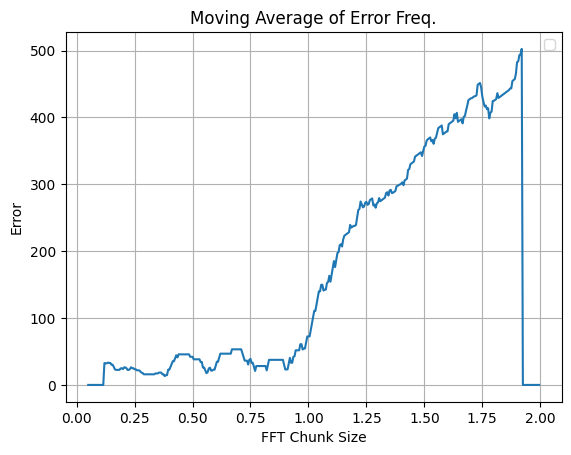

[62, 57, 79, 68, 0, 79, 0, 90, 119, 25, 0, 0, 0, 0, 0, 33, 0, 0, 37, 153, 0, 41, 0, 44, 0, 45, 0, 49, 0, 0, 52, 54, 110, 57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 0, 0, 74, 0, 0, 77, 0, 80, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 109, 0, 0, 113, 0, 0, 0, 0, 0, 121, 0, 247, 0, 126, 127, 129, 0, 131, 133, 0, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 168, 169, 171, 0, 0, 175, 1, 177, 178, 0, 181, 182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 215, 216, 0, 0, 0, 0, 221, 0, 0, 0, 0, 0, 0, 0, 0, 0, 236, 237, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 259, 260, 0, 0, 266, 24, 268, 0, 0, 1, 274, 0, 0, 277, 2, 279, 263, 0, 0, 285, 287, 287, 288, 0, 291, 292, 294, 0, 296, 0, 0, 300, 0, 304, 304, 306, 0, 308, 309, 312, 0, 317, 315, 316, 317, 319, 162, 321, 166, 323, 325, 326, 328, 329, 167, 332, 333, 0, 336, 336, 338, 340, 340, 171, 172, 345, 172, 347, 173, 350, 176, 353, 353, 0, 357, 179, 359, 361, 362, 182

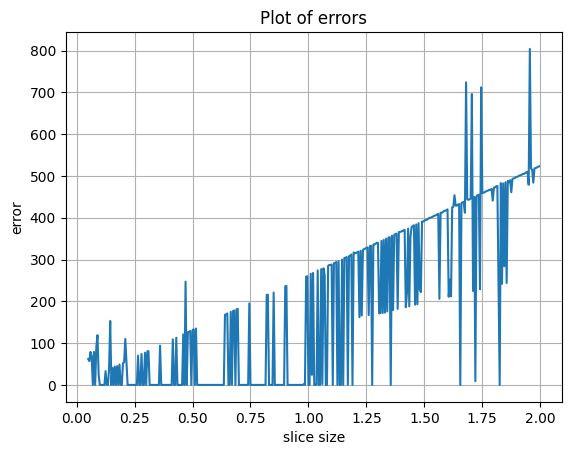

In [121]:
plot_errors("sample_1.wav")